In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mglearn import discrete_scatter

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_openml


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap,TSNE

Note: In image we dont see linearity, because in image data it is made of pixel. So, we do the dimension reduction with non-linear technique like kernelpca (Manifold Learning)

Note: We need to scale the image data, by dividing by 255 or use mix-max sclaer. " Use whitening=True" in image because if the color of grass is green, then the pixels are same in this case. Using whitening, it removes the correlation when the pixels are same. 

# Loading fashion dataset

In [2]:
fmnist = fetch_openml("fashion-mnist")

In [3]:
fmnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
print(fmnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [5]:
df1 = pd.DataFrame(data= fmnist.data, columns=fmnist.feature_names)

In [6]:
df1.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df1.shape

(70000, 784)

# Scaling data

In [8]:
X = fmnist.data/255
y = fmnist.target

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

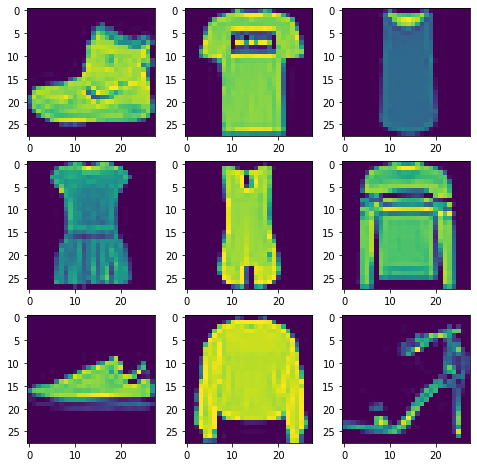

In [10]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i].reshape(28,28)) #printing 9 rows of data

# Dimension Reduction using PCA
- In image we dont see linearity, because in image data it is made of pixel. So, we do the dimension reduction with non-linear technique like kernelpca (Manifold Learning)

### using the ratio for n_components

In [11]:
pca = PCA(n_components=0.95,random_state=42) #0.95 means we are trying to preserve 95% of data

In [12]:
# Lets fit the pca
pca.fit(X)

PCA(n_components=0.95, random_state=42)

In [13]:
# Lets transform the X
reduced_X = pca.transform(X)

In [14]:
reduced_X.shape

(70000, 188)

<mark> We can see that the original shape of X has been reduced from 784 to 188. Now,lets visualize how the data looks like.

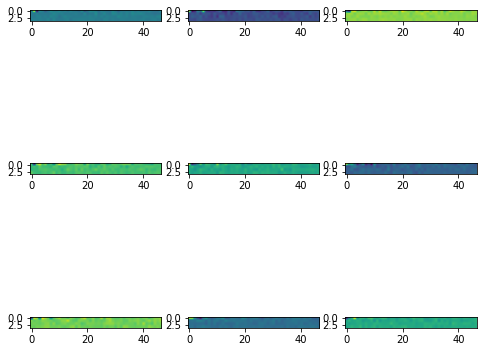

In [15]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reduced_X[i].reshape(4,47)) #printing 9 rows of data

### Recovering the reduced data

In [16]:
recovered_X = pca.inverse_transform(reduced_X)

In [17]:
recovered_X.shape

(70000, 784)

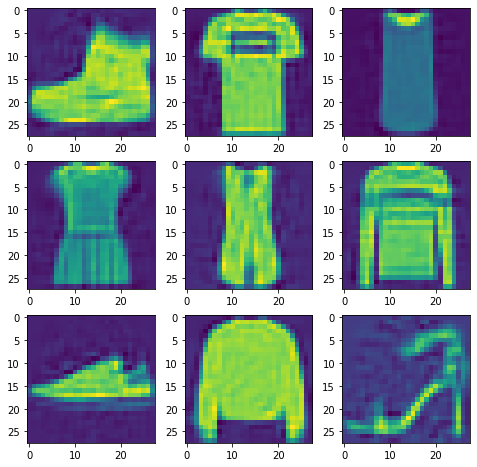

In [18]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(recovered_X[i].reshape(28,28)) #printing 9 rows of data

<mark> If we compare X and the recovered_X, we can see that, we still have good results, though recovered_x is a bit blur. 

### Checking the error between X and recovered_X

In [19]:
reconstruction_error = mean_squared_error(X, recovered_X)

In [20]:
reconstruction_error

0.004327776957560447

# Principal Component Analysis(PCA)

### KernelPCA
- first we will reduce dimension with PCA and then we will use kernelpca to fit and tranform.

<mark>The dataset is too big for this computer to load. So, we are taking only 10,000 samples from the original dataset. This is just for a practice purpose. The original dataset is uniformly distributed among all classes. So, we will extract 10,000 instances randomly out of the original dataset and form a new dataset as shown below. 

In [21]:
df1['Target']=fmnist.target #Adding target to the dataset

In [22]:
df1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
# Creating new dataset with 10,000 instances
new_df = df1.sample(n=10000,random_state=42,)

In [24]:
new_df.Target.value_counts()

3    1042
6    1032
9    1026
5    1022
1    1001
2     997
0     995
7     982
8     955
4     948
Name: Target, dtype: int64

In [62]:
new_df.shape

(10000, 785)

In [25]:
X = new_df.drop('Target', axis=1)
y = new_df.Target

In [27]:
#for i in range(9):   
    #print(np.array(X[i:i+1]).reshape(28,28))

### Ploting the first 9 rows from the new dataset

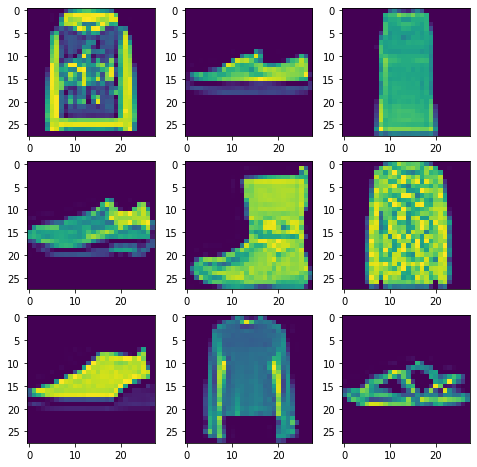

In [28]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.array(X[i:i+1]).reshape(28,28)) #printing 9 rows of data

#### Principal Component analysis
- We will use principal component analysis to reduce to number of features.
- The principal components correspond to directions in the original data, so they are combinations of the original features.

In [29]:
pca1 = PCA(n_components=2)

In [30]:
pca1.fit(X)

PCA(n_components=2)

In [31]:
X_transfored = pca1.transform(X)

In [32]:
X_transfored.shape

(10000, 2)

<mark> Now, we can see that the shape has been converted to (10000,2) from (10000,785) using pca. These 2 new features are the principal components which correspond to directions in the original data, so they are combinations of the original features.

#### Logistic Regression

<mark> Lets use logistic Regression to see how the pca has done.

In [64]:
log_reg = LogisticRegression()

In [66]:
log_reg.fit(X_transfored,y)
pca_score = log_reg.score(X_transfored, y)
print(pca_score)

0.496


/Users/shreesapkota/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using KernelPCA
- using kernel ='rbf'

In [33]:
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=0.001, fit_inverse_transform=True)

In [34]:
kpca_reduced = kpca.fit_transform(X)

In [35]:
kpca_reduced

array([[ 0.00091758, -0.00240756],
       [-0.00011672,  0.02359887],
       [ 0.00028681, -0.0028347 ],
       ...,
       [-0.00055281, -0.00043941],
       [-0.00070813, -0.00196658],
       [-0.0006644 , -0.00175945]])

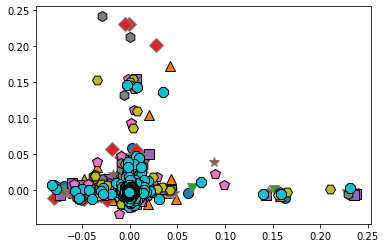

In [36]:
discrete_scatter(kpca_reduced[:,0], kpca_reduced[:,1],y );

#### Logistic Regression with KernelPCa

In [68]:
log_reg1 = LogisticRegression()
log_reg1.fit(kpca_reduced,y)
kpca_score=log_reg1.score(kpca_reduced,y)
print(kpca_score)

0.1043


# GridSearchCV with KernelPCA
- Here we will use the pipeline and gridsearch cv to make it short and effective
- We will use a supervised learning model like Logistic Regression, or SVC to identify the best scores. 

In [37]:
pipe = Pipeline([
    ("kpca",KernelPCA(n_components=2,)),
    ("svc", SVC()),
])

In [38]:
param = {"kpca__gamma":np.linspace(0.03,0.05,num=10),
        "kpca__kernel":['rbf', 'sigmoid','poly']}

In [39]:
grid = GridSearchCV(estimator=pipe, param_grid=param, cv=3,)

In [40]:
grid.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('svc', SVC())]),
             param_grid={'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                         'kpca__kernel': ['rbf', 'sigmoid', 'poly']})

In [41]:
print(grid.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'poly'}


In [42]:
print(grid.best_score_)

0.48950044974503454


In [43]:
best_pca = KernelPCA(n_components=2,kernel='linear',
                     gamma=0.03,fit_inverse_transform=True)

In [44]:
reduce_X = best_pca.fit_transform(X)

In [45]:
reduce_X

array([[  566.58043171,   191.10351726],
       [-1676.86030845,   -62.46023975],
       [  337.58886167, -1147.24165953],
       ...,
       [  490.05961672,  -258.2817161 ],
       [ 1282.17987514,   401.64629531],
       [ 1345.29622342,   821.38675067]])

In [46]:
X_trans = best_pca.inverse_transform(reduce_X) 

In [47]:
recons_err = mean_squared_error(X,X_trans)

In [48]:
print(recons_err)

2.5999656405255935e-10


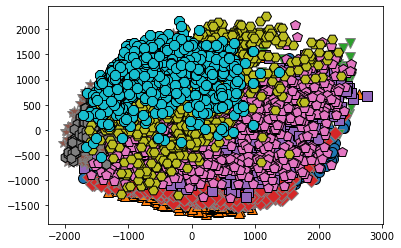

In [60]:
discrete_scatter(reduce_X[:,0],reduce_X[:,1],y);

# LLE (Locally Linear Embedding)

In [49]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10,random_state=42)

In [50]:
lle_reduced= lle.fit_transform(X)

In [51]:
lle_reduced

array([[-0.00633612, -0.00869756],
       [ 0.01602866,  0.00300932],
       [-0.00780539,  0.00305558],
       ...,
       [-0.00655463, -0.00692384],
       [-0.00637426, -0.00869688],
       [-0.00632282, -0.00886772]])

In [52]:
#converting target y in datatype 'int' f
a = y.astype(dtype=int)

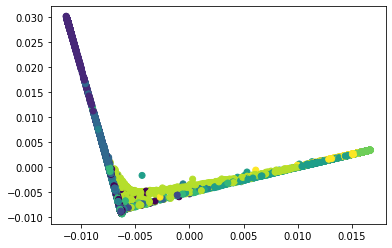

In [53]:
# Visualizing using matplotlib
plt.scatter(x=lle_reduced[:,0], y=lle_reduced[:,1],c=a)

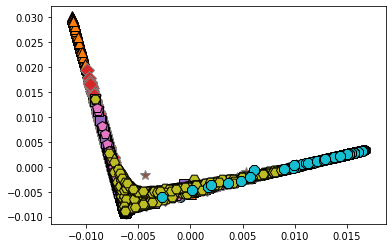

In [54]:
# Visualizing using mglearn
discrete_scatter(lle_reduced[:,0],lle_reduced[:,1],y);

# MDS, ISOMAP, t-sne

In [55]:
mds = MDS(n_components=2,random_state=42)
#mds_reduced = mds.fit_transform(X) # This took too long to fit. So, I commented it out.

<mark>for visualization, we use tsne or so

In [57]:
tsne = TSNE(n_components=2,random_state=42)
tsne_reduced = tsne.fit_transform(X)

In [58]:
tsne_reduced

array([[-14.108391  , -34.374043  ],
       [ -2.2674637 ,  72.28162   ],
       [ 38.601654  , -11.702832  ],
       ...,
       [ -0.65936077, -32.463173  ],
       [-19.540699  , -44.17709   ],
       [-41.13351   , -38.835716  ]], dtype=float32)

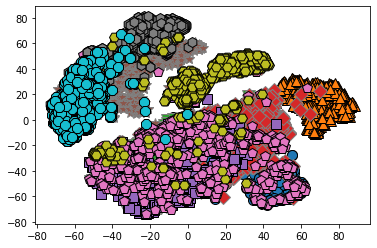

In [59]:
discrete_scatter(tsne_reduced[:,0],tsne_reduced[:,1],y);

# Pipe PCA and LLE
- PCA(n_components=0.95) means, it will preserve 95% of the information
- n_jobs = -1 means, it will use all the cores of the computer. 

In [70]:
pipe1 = Pipeline([("pca", PCA(n_components=0.95,random_state=42)),
                  ("lle",LocallyLinearEmbedding(n_components=2,n_jobs=-1)),
                 ("log_reg",LogisticRegression())])

pipe1.fit(X,y)
pipe1.score(X,y)

0.3651